Número de filas y columnas en X (datos): (150, 4)
Longitud de y (etiquetas): (150,)
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Best Cross-validation Accuracy: 0.9583333333333334
Accuracy on Test Data: 1.0

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



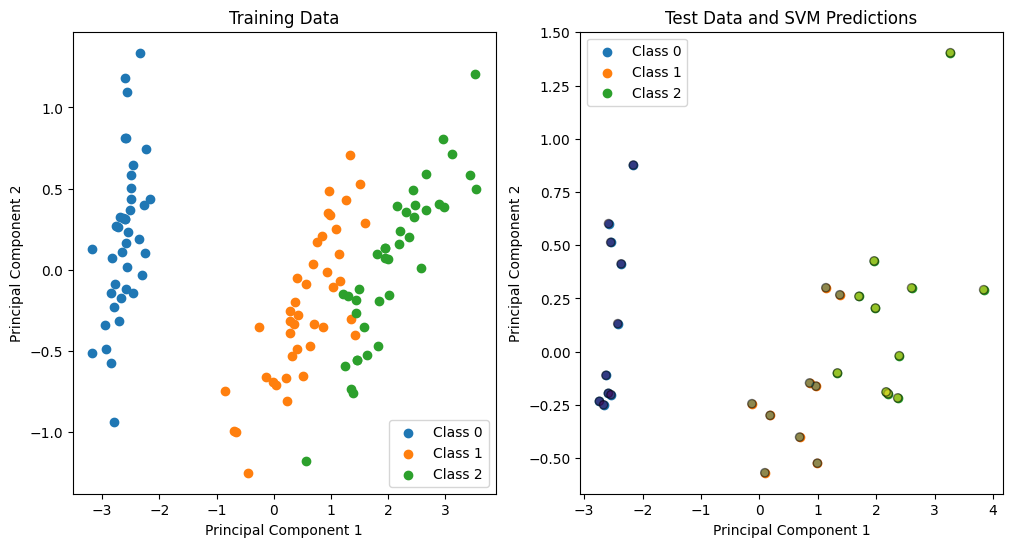

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA  # Para reducir la dimensionalidad y poder graficar

# conjunto de datos de ejemplo
iris = datasets.load_iris()
X = iris.data
y = iris.target

# número de filas y columnas de los datos
print("Número de filas y columnas en X (datos):", X.shape)

# longitud del vector de etiquetas y
print("Longitud de y (etiquetas):", y.shape)

#iris.data: features de las flores.
#iris.target: las etiquetas (0 para setosa, 1 para versicolor, y 2 para virginica).
#iris.feature_names: nombres de las variables
#iris.target_names: nombres de las etiquetas

# conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  modelo y parámetros para el grid search
model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],  # Lista de valores para C
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Diferentes tipos de kernels a probar
    'gamma': ['scale', 'auto'],  # Valores de gamma
    'degree': [2, 3, 4]  # Grados para el kernel polinómico, si se usa
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# entrenamos
grid_search.fit(X_train, y_train)

# mostramos los mejores parámetros y el mejor modelo encontrado
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# reducimos dimensiones para visualización
pca = PCA(n_components=2)  # reducción a 2 dimensiones
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# predecimos usando el mejor modelo
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# evaluamos el modelo
print("Accuracy on Test Data:", accuracy_score(y_test, predictions))
print("\nClassification Report on Test Data:\n", classification_report(y_test, predictions))

# graficamos la distribución de los datos y los resultados del modelo
plt.figure(figsize=(12, 6))

# graficamos los datos de train
plt.subplot(1, 2, 1)
for i in range(len(np.unique(y_train))):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=f"Class {i}")
plt.title("Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

# graficamos los datos de test con predicciones
plt.subplot(1, 2, 2)
for i in range(len(np.unique(y_test))):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[predictions == i, 1], label=f"Class {i}")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=predictions, cmap='viridis', alpha=0.5, edgecolor='k')
plt.title("Test Data and SVM Predictions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.show()